In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
rome = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Airbnb listings in Rome (August 2015).csv',
                   encoding='utf8')

In [4]:
rome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15703 entries, 0 to 15702
Data columns (total 16 columns):
Unnamed: 0              15703 non-null int64
room_id                 15703 non-null int64
host_id                 15703 non-null int64
room_type               15703 non-null object
city                    0 non-null float64
neighborhood            15703 non-null object
reviews                 15703 non-null int64
overall_satisfaction    10656 non-null float64
accommodates            12861 non-null float64
bedrooms                15670 non-null float64
bathrooms               15537 non-null float64
price                   15703 non-null float64
minstay                 14320 non-null float64
latitude                15703 non-null float64
longitude               15703 non-null float64
collected               15703 non-null object
dtypes: float64(9), int64(4), object(3)
memory usage: 1.9+ MB


In [5]:
rome.drop('city', axis=1, inplace=True)

In [6]:
rome.bedrooms.isnull().sum()

33

In [7]:
rome = rome[rome['bedrooms'].notnull()]

In [8]:
rome.bathrooms[rome.bathrooms==0].value_counts()

0.0    61
Name: bathrooms, dtype: int64

In [9]:
# We have removed the rows that had "0" bathrooms. We are assuming every house comes with atleast 1 bathroom.
rome = rome[rome['bathrooms'] != 0.]

In [10]:
rome.sort_values('bedrooms', inplace=True)

In [11]:
rome = rome.reset_index()

In [12]:
rome.drop(['index','Unnamed: 0'], axis=1, inplace=True)

In [13]:
rome.head(2)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,6408911,5056483,Entire home/apt,I Municipio,0,NaN,2.0,0.0,1.0,167.0,3.0,41.890418,12.469850,2015-08-30 03:34:51.607302
1,7072260,17215980,Entire home/apt,VII Municipio,2,4.5,4.0,0.0,1.0,52.0,2.0,41.891317,12.561203,2015-08-29 22:16:46.220345


In [14]:
# Imputation for Bathrooms
rome.bathrooms.fillna(method='bfill',inplace=True)


In [15]:
rome.neighborhood.value_counts()

I Municipio        6825
XVII Municipio     2164
IX Municipio       1236
XVIII Municipio    1114
XVI Municipio       929
II Municipio        856
III Municipio       616
VI Municipio        598
XI Municipio        426
X Municipio         246
XV Municipio        243
XIX Municipio       218
VII Municipio        73
XII Municipio        49
V Municipio           6
IV Municipio          6
XX Municipio          3
XIII Municipio        1
Name: neighborhood, dtype: int64

In [16]:
rome.neighborhood.replace('I Municipio','Municipio 1', inplace=True)
rome.neighborhood.replace('II Municipio','Municipio 2', inplace=True)
rome.neighborhood.replace('III Municipio','Municipio 2', inplace=True)
rome.neighborhood.replace('IV Municipio','Municipio 3', inplace=True)
rome.neighborhood.replace('V Municipio','Municipio 4', inplace=True)
rome.neighborhood.replace('VI Municipio','Municipio 5', inplace=True)
rome.neighborhood.replace('VII Municipio','Municipio 5', inplace=True)
rome.neighborhood.replace('IX Municipio','Municipio 7', inplace=True)
rome.neighborhood.replace('X Municipio','Municipio 7', inplace=True)
rome.neighborhood.replace('XI Municipio','Municipio 8', inplace=True)
rome.neighborhood.replace('XII Municipio','Municipio 9', inplace=True)
rome.neighborhood.replace('XIII Municipio','Municipio 10', inplace=True)
rome.neighborhood.replace('XV Municipio','Municipio 11', inplace=True)
rome.neighborhood.replace('XVI Municipio','Municipio 12', inplace=True)
rome.neighborhood.replace('XVIII Municipio','Municipio 13', inplace=True)
rome.neighborhood.replace('XIX Municipio','Municipio 14', inplace=True)
rome.neighborhood.replace('XX Municipio','Municipio 15', inplace=True)
rome.neighborhood.replace('XVII Municipio','Municipio 1', inplace=True)






In [17]:
rome.head(2)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,6408911,5056483,Entire home/apt,Municipio 1,0,NaN,2.0,0.0,1.0,167.0,3.0,41.890418,12.469850,2015-08-30 03:34:51.607302
1,7072260,17215980,Entire home/apt,Municipio 5,2,4.5,4.0,0.0,1.0,52.0,2.0,41.891317,12.561203,2015-08-29 22:16:46.220345


In [18]:
rome.columns

Index([u'room_id', u'host_id', u'room_type', u'neighborhood', u'reviews',
       u'overall_satisfaction', u'accommodates', u'bedrooms', u'bathrooms',
       u'price', u'minstay', u'latitude', u'longitude', u'collected'],
      dtype='object')

In [19]:
import numpy as np

In [20]:
custom = lambda x: np.average(x)
df1 = pd.DataFrame(rome.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [21]:
df1 = df1.reset_index(level = 0)

In [22]:
df1.sort('host_id', ascending=False, inplace=True)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [23]:
df1

,neighborhood,reviews,host_id,price
0,Municipio 1,140078,8989,132.265547
11,Municipio 7,18230,1482,75.153846
7,Municipio 2,15692,1472,99.584918
4,Municipio 13,11625,1114,103.964991
3,Municipio 12,12059,929,100.216362
10,Municipio 5,9573,671,56.576751
12,Municipio 8,3908,426,92.579812
2,Municipio 11,2735,243,75.349794
5,Municipio 14,1475,218,93.490826
13,Municipio 9,423,49,160.857143


In [24]:
def standardize(S):
    scaler = preprocessing.StandardScaler().fit(S)
    return scaler.transform(S)

In [25]:
df1.host_id = standardize(df1.host_id)
df1.reviews = standardize(df1.reviews)
df1.price = standardize(df1.price)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWar

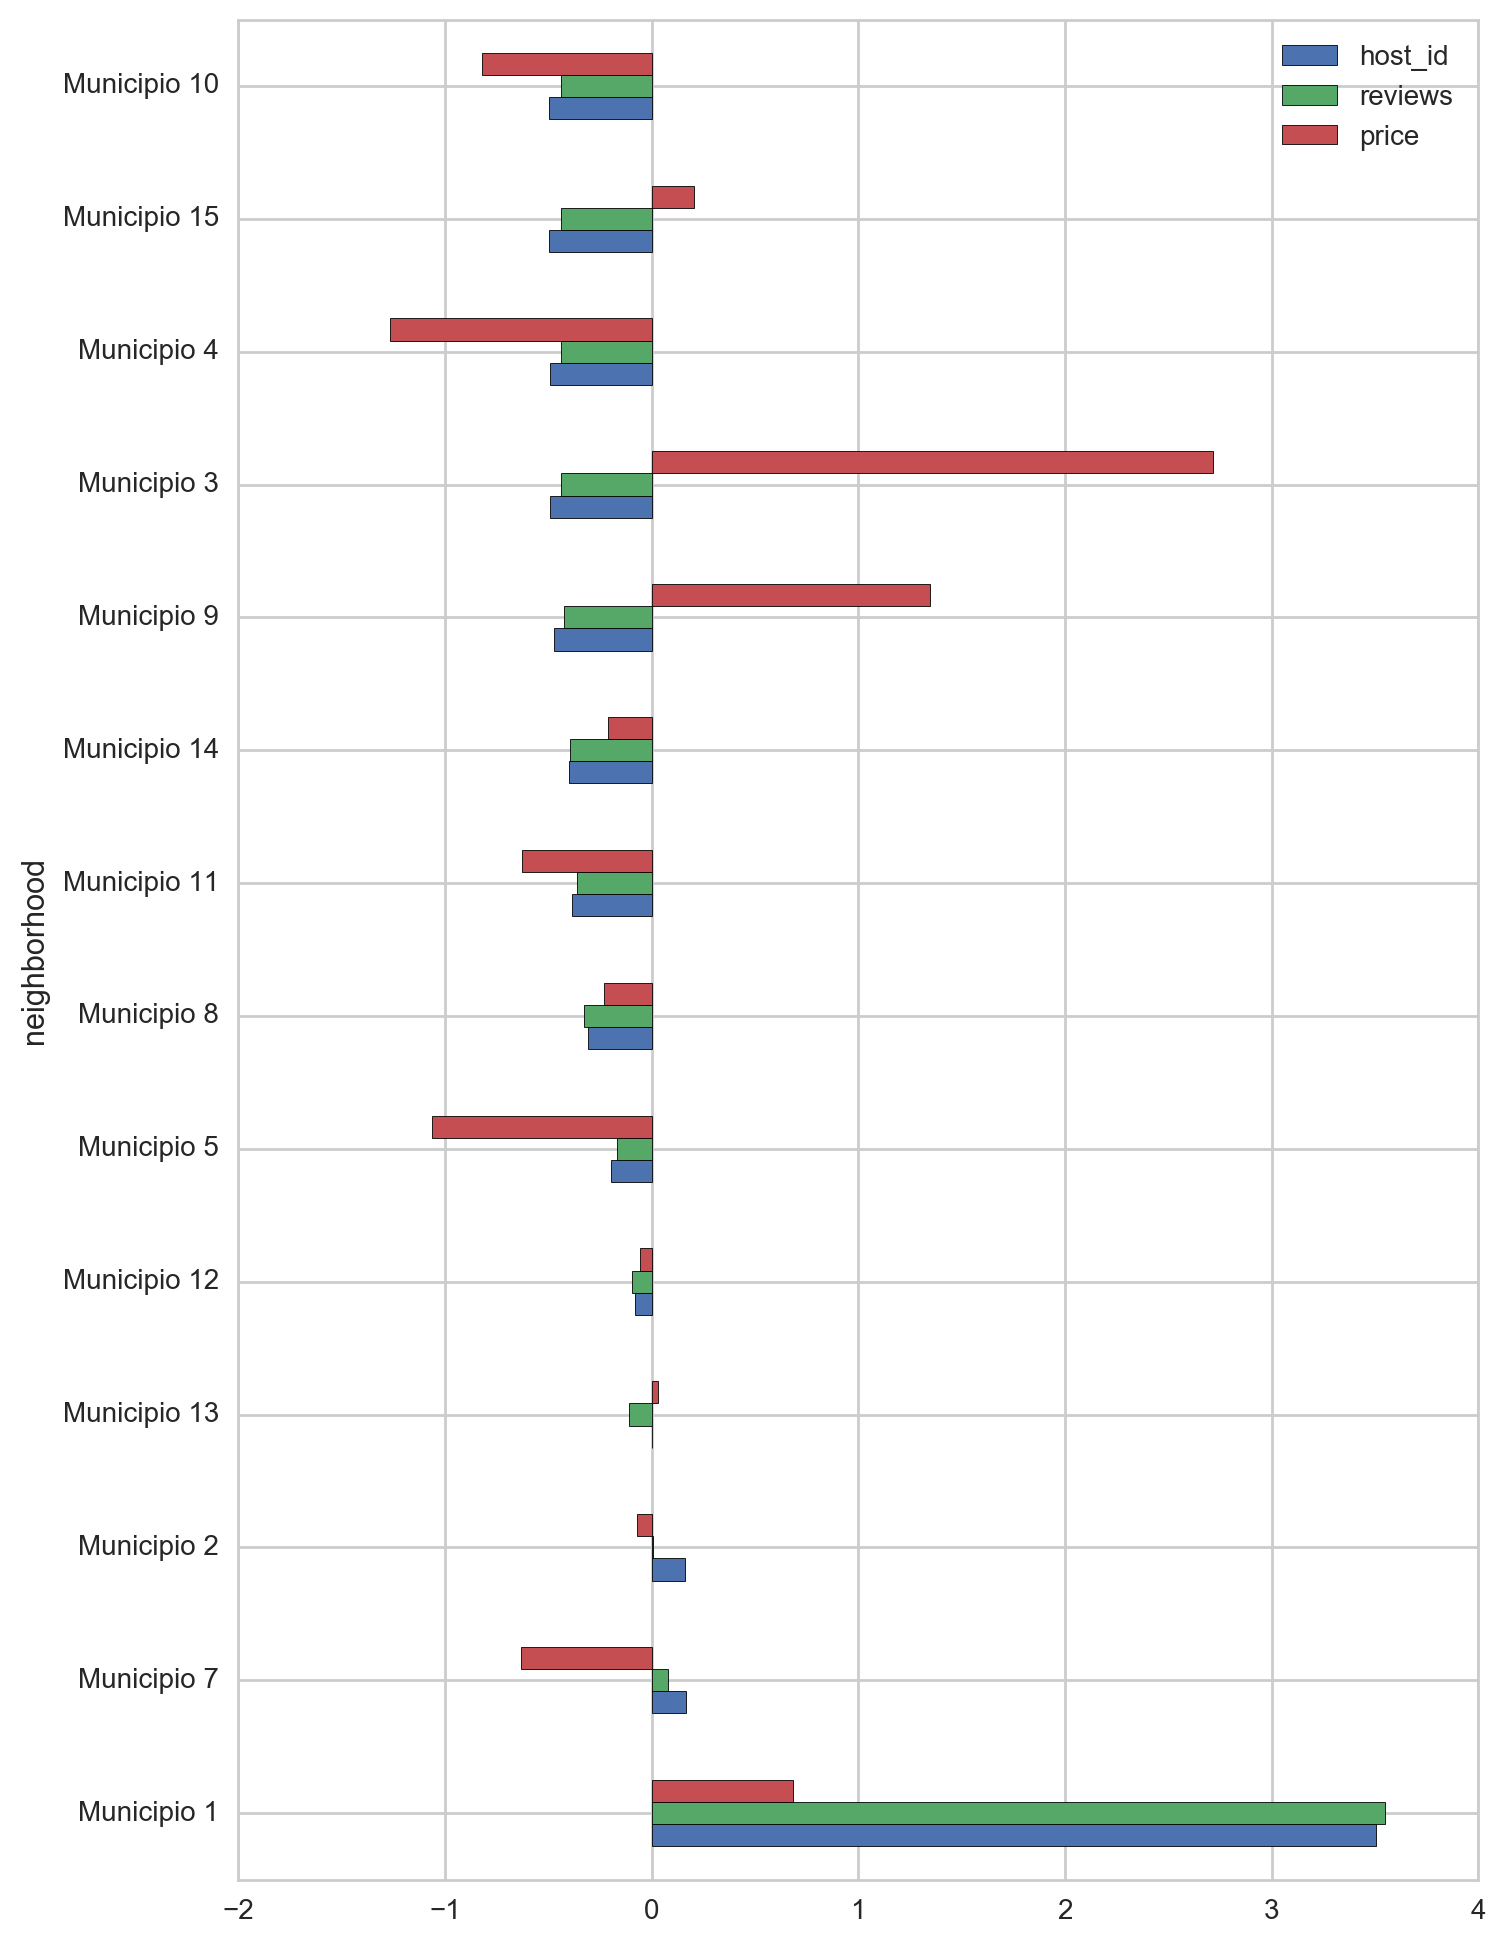

In [26]:
df1.plot(x = 'neighborhood', y = ['host_id','reviews','price'], kind ='barh', figsize =(8, 12))

In [27]:
custom = lambda x: np.average(x)
df2 = pd.DataFrame(rome.groupby(['neighborhood','room_type']).agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [28]:
df2.head(2)

reviews  host_id       price
neighborhood room_type                                    
Municipio 1  Entire home/apt   106681     6322  148.562955
             Private room       32947     2643   94.186152

In [29]:
df2.reset_index(level=0, inplace=True)

In [30]:
df2.reset_index(inplace=True)

In [31]:
df2.head(2)

,room_type,neighborhood,reviews,host_id,price
0,Entire home/apt,Municipio 1,106681,6322,148.562955
1,Private room,Municipio 1,32947,2643,94.186152


In [32]:
df2.host_id = standardize(df2.host_id)
df2.reviews = standardize(df2.reviews)
df2.price = standardize(df2.price)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either usin

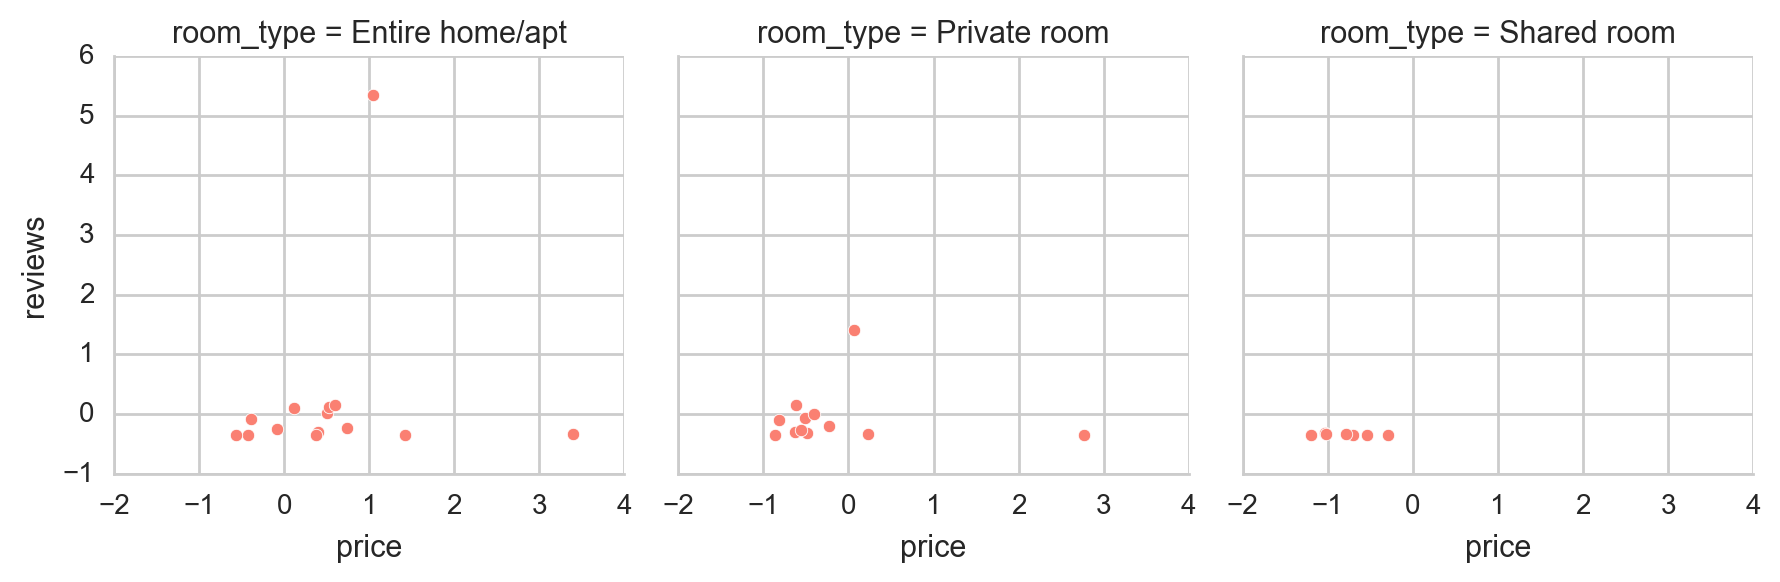

In [33]:
g = sns.FacetGrid(df2, col="room_type")
g = g.map(plt.scatter,"price","reviews", edgecolor="w", color = "salmon")

In [34]:
custom = lambda x: np.average(x)
neighborhood_data = pd.DataFrame(rome.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom, 'latitude':custom,'longitude':custom}))

In [35]:
neighborhood_data

,reviews,host_id,price,longitude,latitude
neighborhood,,,,,
Municipio 1,140078,8989,132.265547,12.477739,41.898736
Municipio 10,1,1,67.000000,12.347102,41.781682
Municipio 11,2735,243,75.349794,12.464966,41.865597
Municipio 12,12059,929,100.216362,12.458499,41.876265
Municipio 13,11625,1114,103.964991,12.445284,41.897274
Municipio 14,1475,218,93.490826,12.440536,41.915985
Municipio 15,4,3,111.333333,12.471021,41.973263
Municipio 2,15692,1472,99.584918,12.503962,41.915436
Municipio 3,28,6,220.166667,12.529179,41.946107


In [36]:
neighborhood_data.reset_index(inplace =True)

In [37]:
neighborhood_data.columns

Index([u'neighborhood', u'reviews', u'host_id', u'price', u'longitude',
       u'latitude'],
      dtype='object')

In [38]:
neighborhood_data['order_by'] = neighborhood_data.neighborhood.map(lambda x: int(x.split(" ")[1]))

In [39]:
neighborhood_data

,neighborhood,reviews,host_id,price,longitude,latitude,order_by
0,Municipio 1,140078,8989,132.265547,12.477739,41.898736,1
1,Municipio 10,1,1,67.000000,12.347102,41.781682,10
2,Municipio 11,2735,243,75.349794,12.464966,41.865597,11
3,Municipio 12,12059,929,100.216362,12.458499,41.876265,12
4,Municipio 13,11625,1114,103.964991,12.445284,41.897274,13
5,Municipio 14,1475,218,93.490826,12.440536,41.915985,14
6,Municipio 15,4,3,111.333333,12.471021,41.973263,15
7,Municipio 2,15692,1472,99.584918,12.503962,41.915436,2
8,Municipio 3,28,6,220.166667,12.529179,41.946107,3
9,Municipio 4,59,6,47.666667,12.548166,41.916531,4


In [40]:
neighborhood_data.sort_values('order_by', inplace=True)

In [41]:
neighborhood_data

,neighborhood,reviews,host_id,price,longitude,latitude,order_by
0,Municipio 1,140078,8989,132.265547,12.477739,41.898736,1
7,Municipio 2,15692,1472,99.584918,12.503962,41.915436,2
8,Municipio 3,28,6,220.166667,12.529179,41.946107,3
9,Municipio 4,59,6,47.666667,12.548166,41.916531,4
10,Municipio 5,9573,671,56.576751,12.539381,41.884321,5
11,Municipio 7,18230,1482,75.153846,12.523719,41.875769,7
12,Municipio 8,3908,426,92.579812,12.482742,41.863607,8
13,Municipio 9,423,49,160.857143,12.467805,41.827829,9
1,Municipio 10,1,1,67.000000,12.347102,41.781682,10
2,Municipio 11,2735,243,75.349794,12.464966,41.865597,11


In [42]:
# define price

def price_color(neighborhood_data, row):
    
    price_max = np.max(neighborhood_data.price)
    price_min = np.min(neighborhood_data.price)
    
    
    if price_min <= neighborhood_data.ix[row, 'price'] < price_min + ((price_max - price_min)/3):
        return 'green'
    elif price_min + ((price_max - price_min)/3) <= neighborhood_data.ix[row, 'price'] < (price_min + 2*(price_max - price_min)/3):
        return 'orange'
    else:
        return 'red'

In [43]:
import folium

In [44]:
rome_map = folium.Map(location=[41.9027835, 12.4963655])

for each_row in range(neighborhood_data.shape[0]):
     rome_map.simple_marker(location = [neighborhood_data.ix[each_row,'latitude'],neighborhood_data.ix[each_row,'longitude']],
                            popup = str(neighborhood_data.ix[each_row,'neighborhood'])+" "+str(neighborhood_data.ix[each_row,'price']),
                            marker_color = price_color(neighborhood_data,each_row)
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [45]:
rome_map

In [46]:
import json

In [47]:
with open("/users/Jyots/Desktop/DS_Projects/airbnb_DataSets/Mappa dei nuovi Municipi di Roma 2013.json") as fp:
    geodata = json.load(fp)

In [48]:
for i in range(len(geodata['features'])):
    print geodata['features'][i]['properties']['Name']

Municipio I
Municipio II
Municipio II(from ex III)
Municipio III
Municipio VII (from ex IX)
Municipio IV
Municipio V
Municipio V(from ex VII)
Municipio VI
Municipio VII(from ex X)
Municipio VIII
Municipio IX
Municipio X
Municipio XIV
Municipio XI
Municipio XII
Municipio I(from ex VII)
Municipio XIII
Municipio XV
Municipio XV(from ex XX) 


In [49]:
#geodata['features']

In [50]:
#len(geodata['features'])

In [51]:
for i in range(len(geodata['features'])):
    print geodata['features'][i]['geometry']['type']

Polygon
Polygon
Polygon
Polygon
Polygon
MultiPolygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon


In [52]:
print geodata['features'][3]['properties']['Name']

Municipio III


In [53]:
geodata['features']

[{u'geometry': {u'coordinates': [[[12.47162, 41.872776, 0.0],
     [12.47423, 41.872969, 0.0],
     [12.475414, 41.873388, 0.0],
     [12.477943, 41.874901, 0.0],
     [12.480413, 41.875993, 0.0],
     [12.481753, 41.876246, 0.0],
     [12.482027, 41.875495, 0.0],
     [12.483224, 41.872718, 0.0],
     [12.48398, 41.872567, 0.0],
     [12.485563, 41.872377, 0.0],
     [12.493942, 41.871046, 0.0],
     [12.496916, 41.870775, 0.0],
     [12.501818, 41.870882, 0.0],
     [12.501879, 41.871477, 0.0],
     [12.50196, 41.872012, 0.0],
     [12.501844, 41.872372, 0.0],
     [12.501608, 41.873186, 0.0],
     [12.501782, 41.873305, 0.0],
     [12.502761, 41.873707, 0.0],
     [12.503402, 41.874274, 0.0],
     [12.50369, 41.874738, 0.0],
     [12.503246, 41.875014, 0.0],
     [12.502722, 41.875365, 0.0],
     [12.50237, 41.875891, 0.0],
     [12.502355, 41.876272, 0.0],
     [12.502592, 41.876734, 0.0],
     [12.502727, 41.877195, 0.0],
     [12.502698, 41.877614, 0.0],
     [12.502371, 41.87816

In [54]:
neighborhoodold_currentname = {}
neighborhoodold_coords = {}
neighborhood_coords = {}

for i in range(len(geodata['features'])):
    neighborhoodold_coords[geodata['features'][i]['properties']['Description']] = geodata['features'][i]['geometry']['coordinates']
    neighborhoodold_currentname[geodata['features'][i]['properties']['Name']] = geodata['features'][i]['properties']['Description']
    neighborhood_coords[geodata['features'][i]['properties']['Name']] = geodata['features'][i]['geometry']['coordinates']

In [55]:
neighborhood_coords = pd.DataFrame(neighborhood_coords.items(), columns = ['neighborhood', 'long_lat'])
neighborhoodold_currentname = pd.DataFrame(neighborhoodold_currentname.items(), columns = ['current_name','neighborhoodold'])
neighborhoodold_coords = pd.DataFrame(neighborhoodold_coords.items(), columns = ['neighborhood', 'long_lat'])

In [56]:
neighborhood_coords.sort_values('neighborhood',inplace=True)
neighborhoodold_currentname.sort_values('current_name',inplace=True)
neighborhoodold_coords.sort_values('neighborhood',inplace=True)

In [57]:
neighborhood_coords = neighborhood_coords.reset_index()
neighborhood_coords.drop('index', axis=1,inplace= True)

neighborhoodold_currentname = neighborhoodold_currentname.reset_index()
neighborhoodold_currentname.drop('index', axis=1,inplace= True)

neighborhoodold_coords = neighborhoodold_coords.reset_index()
neighborhoodold_coords.drop('index', axis=1,inplace= True)


In [58]:
neighborhood_data.reset_index(inplace=True)

In [59]:
#neighborhood_data

In [60]:
# neighborhood_coords.neighborhood[0] = 'Municipio 1'
# neighborhood_coords.neighborhood[1] = 'Municipio 1'
# neighborhood_coords.neighborhood[2] = 'Municipio 2'
# neighborhood_coords.neighborhood[3] = 'Municipio 2'
# neighborhood_coords.neighborhood[4] = 'Municipio 3'
# neighborhood_coords.neighborhood[5] = 'Municipio 4'
# neighborhood_coords.neighborhood[6] = 'Municipio 9'
# neighborhood_coords.neighborhood[7] = 'Municipio 5'
# neighborhood_coords.neighborhood[8] = 'Municipio 5'
# neighborhood_coords.neighborhood[9] = 'Municipio 6'
# neighborhood_coords.neighborhood[10] = 'Municipio 7'
# neighborhood_coords.neighborhood[11] = 'Municipio 7'
# neighborhood_coords.neighborhood[12] = 'Municipio 8'
# neighborhood_coords.neighborhood[13] = 'Municipio 10'
# neighborhood_coords.neighborhood[14] = 'Municipio 11'
# neighborhood_coords.neighborhood[15] = 'Municipio 12'
# neighborhood_coords.neighborhood[16] = 'Municipio 13'
# neighborhood_coords.neighborhood[17] = 'Municipio 14'
# neighborhood_coords.neighborhood[18] = 'Municipio 15'
# neighborhood_coords.neighborhood[19] = 'Municipio 15'




In [61]:
#neighborhoodold_coords

In [62]:
#neighborhoodold_currentname

In [63]:
neighborhood_coords['longitude'] = 0
neighborhood_coords['latitude'] = 0

In [64]:
import shapely
from shapely.geometry import MultiPolygon, Point, Polygon

In [65]:
#define the conversion function to convert the raw coordinates to coordinates for multipolygon

def PrepCoordsForShapely(rawcoords):
    preppedcoords = []
    #according to the geojson specs, a multipolygon is a list of linear rings, so we loop each
    for eachpolygon in rawcoords:
        #print eachpolygon
        #the first linear ring is the coordinates of the polygon, and shapely needs it to be a tuple
        tupleofcoords = tuple(eachpolygon[0])
        #the remaining linear rings, if any, are the coordinates of inner holes, and shapely needs these to be nested in a list
        if len(eachpolygon) > 1:
            listofholes = list(eachpolygon[1:])
        else:
            listofholes = []
        #shapely defines each polygon in a multipolygon with the polygoon coordinates and the list of holes nested inside a tuple
        eachpreppedpolygon = (tupleofcoords, listofholes)
        #so append each prepped polygon to the final multipolygon list
        preppedcoords.append(eachpreppedpolygon)
    #finally, the prepped coordinates need to be nested inside a list in order to be used as a star-argument for the MultiPolygon constructor.
    return [preppedcoords]

In [66]:
#neighborhood_coords["long_lat"][2]

In [67]:
# Each borough except the sixth is made up of multiple polygons, first retrieve the coordinates 

for i in range(neighborhood_coords.shape[0]):
    rawcoords = neighborhood_coords["long_lat"][i]
    
    if geodata['features'][i]['geometry']['type'] == 'Polygon':
        poly = Polygon(neighborhood_coords.long_lat[i][0])
        neighborhood_coords.longitude[i] = poly.centroid.wkt.split()[1].split('(')[1]
        neighborhood_coords.latitude[i] = poly.centroid.wkt.split()[2].split(')')[0]
    
    else:
        
        # use the function to prepare coordinates for MultiPolygon
        preppedcoords = PrepCoordsForShapely(rawcoords)
    
       # use the prepped coordinates as a star-argument for the MultiPolygon constructor
        multipoly = MultiPolygon(*preppedcoords)
    
        neighborhood_coords.longitude[i] = multipoly.centroid.wkt.split()[1].split('(')[1]
        neighborhood_coords.latitude[i] = multipoly.centroid.wkt.split()[2].split(')')[0]


  

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [68]:
neighborhood_coords

,neighborhood,long_lat,longitude,latitude
0,Municipio I,"[[[12.47162, 41.872776, 0.0], [12.47423, 41.87...",12.48695218500094,41.89184192820256
1,Municipio I(from ex VII),"[[[12.457462, 41.900124, 0.0], [12.458306, 41....",12.45761021730434,41.91493976279813
2,Municipio II,"[[[12.45943, 41.92659, 0.0], [12.459715, 41.92...",12.49335225931483,41.92620634810991
3,Municipio II(from ex III),"[[[12.501074, 41.909521, 0.0], [12.501501, 41....",12.51965259717193,41.90807799715451
4,Municipio III,"[[[12.610538, 41.970227, 0.0], [12.611249, 41....",12.55412979607763,41.99634197834391
5,Municipio IV,"[[[[12.610538, 41.970227, 0.0], [12.611249, 41...",12.59127383536387,41.93202427963454
6,Municipio IX,"[[[12.588008, 41.771795, 0.0], [12.587769, 41....",12.49742921505525,41.75772354669087
7,Municipio V,"[[[12.572839, 41.902773, 0.0], [12.567017, 41....",12.54634470552498,41.88652184274985
8,Municipio V(from ex VII),"[[[12.572839, 41.902773, 0.0], [12.572892, 41....",12.5872203405925,41.89005496509392
9,Municipio VI,"[[[12.5829608075, 41.8578163962, 0.0], [12.585...",12.68599014985687,41.88749006042472


In [69]:
neighborhood_coords.neighborhood.unique()

array([u'Municipio I', u'Municipio I(from ex VII)', u'Municipio II',
       u'Municipio II(from ex III)', u'Municipio III', u'Municipio IV',
       u'Municipio IX', u'Municipio V', u'Municipio V(from ex VII)',
       u'Municipio VI', u'Municipio VII (from ex IX)',
       u'Municipio VII(from ex X)', u'Municipio VIII', u'Municipio X',
       u'Municipio XI', u'Municipio XII', u'Municipio XIII',
       u'Municipio XIV', u'Municipio XV', u'Municipio XV(from ex XX)\xa0'], dtype=object)

In [70]:
neighborhood_coords.neighborhood.replace(u'Municipio XV(from ex XX)\xa0',u'Municipio XV(from ex XX)',inplace=True)

In [71]:
#neighborhood_coords.neighborhood.unique()

In [72]:
import folium


In [73]:
import json

In [74]:
path = '/users/Jyots/Desktop/DS_Projects/airbnb_datasets/Mappa dei nuovi Municipi di Roma 2013.json'


nbrhd_map = folium.Map(location=[41.9027835, 12.4963655],
                    zoom_start=12)
nbrhd_map.choropleth(geo_path=path, fill_opacity=0.2,
                     line_opacity=0.8, line_weight=2)

In [75]:
for each_row in range(neighborhood_coords.shape[0]):
     nbrhd_map.simple_marker(location = [neighborhood_coords.ix[each_row,'latitude'],neighborhood_coords.ix[each_row,'longitude']],
                             popup = str(neighborhood_coords.ix[each_row,'neighborhood']),
                             marker_color = 'orange'
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [76]:
for each_row in range(neighborhood_data.shape[0]):
     nbrhd_map.simple_marker(location = [neighborhood_data.ix[each_row,'latitude'],neighborhood_data.ix[each_row,'longitude']],
                             popup = str(neighborhood_data.ix[each_row,'neighborhood']),
                             marker_color = 'green'
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [77]:
nbrhd_map

In [78]:
import xmltodict

In [79]:
with open("/Users/Jyots/Desktop/DS_Projects/airbnb_datasets/Rome_metro_station_map.kml") as fp:

    rd_metro = xmltodict.parse(fp)

In [80]:
metro_dict = {}

for point in rd_metro['kml']['Document']['Folder']['Placemark']:
    metro_dict[point[u'name']] = point['Point'][u'coordinates'].split(",")

In [81]:
rome_metro = pd.DataFrame(metro_dict.items(), columns =['metro_stn','coordinates'])
rome_metro.head(2)

,metro_stn,coordinates
0,Circo Massimo,"[12.487857599999984, 41.8834094, 0.0]"
1,Repubblica,"[12.495804099999987, 41.902193, 0.0]"


In [82]:
rome_metro['longitude'] = rome_metro['coordinates'].map(lambda x: float(x[0]))
rome_metro['latitude'] = rome_metro['coordinates'].map(lambda x: float(x[1]))

In [83]:
for each_row in range(rome_metro.shape[0]):
     nbrhd_map.circle_marker(location = [rome_metro.ix[each_row,'latitude'],rome_metro.ix[each_row,'longitude']],
                         radius = 30,fill_color = 'blue',line_color = 'blue',fill_opacity = 0.8
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead
  app.launch_new_instance()


In [84]:
nbrhd_map

In [85]:
# create polygon based on polygon or multipolygon type

def polygon_create(polygon_coords, row):

    
    rawcoords = polygon_coords["long_lat"][row]
    
    if geodata['features'][row]['geometry']['type'] == 'Polygon':
        poly = Polygon(rawcoords[0])
    
        return poly
    
    else:
        
        # use the function to prepare coordinates for MultiPolygon
        preppedcoords = PrepCoordsForShapely(rawcoords)
    
       # use the prepped coordinates as a star-argument for the MultiPolygon constructor
        multipoly = MultiPolygon(*preppedcoords)
    
        return multipoly
    

In [86]:
# finding the number of metro stations in each neighborhood

import shapely
from shapely.geometry import Polygon, Point


def dot_count(polygon_coords, dot_coords):
    count_dict = {}

    for row in range(polygon_coords.shape[0]):
        poly = polygon_create(polygon_coords, row)
        count = 0
        for i in range(dot_coords.shape[0]):
            point = Point(dot_coords.ix[i,'longitude'],dot_coords.ix[i,'latitude'])
            #print point
        
            if poly.contains(point):
                count = count + 1
        #print count
        nbrhd_name = polygon_coords.ix[row,'neighborhood']
        count_dict[nbrhd_name] = count
    
    return count_dict

In [87]:
metrostn_count = dot_count(neighborhood_coords, rome_metro)

In [88]:
metrostn_count = pd.DataFrame(metrostn_count.items(),columns=['neighborhood','stn_count'])

In [89]:
metrostn_count.sort_values('neighborhood',inplace=True)

In [90]:
metrostn_count = metrostn_count.reset_index()

In [91]:
metrostn_count

,index,neighborhood,stn_count
0,8,Municipio I,10
1,15,Municipio I(from ex VII),3
2,16,Municipio II,3
3,2,Municipio II(from ex III),4
4,14,Municipio III,2
5,4,Municipio IV,6
6,3,Municipio IX,4
7,12,Municipio V,3
8,6,Municipio V(from ex VII),4
9,9,Municipio VI,12


In [92]:
metrostn_count.neighborhood[0] = 'Municipio 1'
metrostn_count.neighborhood[1] = 'Municipio 1'
metrostn_count.neighborhood[2] = 'Municipio 2'
metrostn_count.neighborhood[3] = 'Municipio 2'
metrostn_count.neighborhood[4] = 'Municipio 3'
metrostn_count.neighborhood[5] = 'Municipio 4'
metrostn_count.neighborhood[6] = 'Municipio 9'
metrostn_count.neighborhood[7] = 'Municipio 5'
metrostn_count.neighborhood[8] = 'Municipio 5'
metrostn_count.neighborhood[9] = 'Municipio 6'
metrostn_count.neighborhood[10] = 'Municipio 7'
metrostn_count.neighborhood[11] = 'Municipio 7'
metrostn_count.neighborhood[12] = 'Municipio 8'
metrostn_count.neighborhood[13] = 'Municipio 10'
metrostn_count.neighborhood[14] = 'Municipio 11'
metrostn_count.neighborhood[15] = 'Municipio 12'
metrostn_count.neighborhood[16] = 'Municipio 13'
metrostn_count.neighborhood[17] = 'Municipio 14'
metrostn_count.neighborhood[18] = 'Municipio 15'
metrostn_count.neighborhood[19] = 'Municipio 15'



/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/J

In [93]:
metrostn_count

,index,neighborhood,stn_count
0,8,Municipio 1,10
1,15,Municipio 1,3
2,16,Municipio 2,3
3,2,Municipio 2,4
4,14,Municipio 3,2
5,4,Municipio 4,6
6,3,Municipio 9,4
7,12,Municipio 5,3
8,6,Municipio 5,4
9,9,Municipio 6,12


In [94]:
metrostn_count = metrostn_count.groupby('neighborhood').agg({'stn_count':'sum'})

In [95]:
metrostn_count.reset_index(inplace=True)

In [96]:
metrostn_count

,neighborhood,stn_count
0,Municipio 1,13
1,Municipio 10,0
2,Municipio 11,0
3,Municipio 12,0
4,Municipio 13,3
5,Municipio 14,1
6,Municipio 15,0
7,Municipio 2,7
8,Municipio 3,2
9,Municipio 4,6


In [97]:
neighborhood_data

,index,neighborhood,reviews,host_id,price,longitude,latitude,order_by
0,0,Municipio 1,140078,8989,132.265547,12.477739,41.898736,1
1,7,Municipio 2,15692,1472,99.584918,12.503962,41.915436,2
2,8,Municipio 3,28,6,220.166667,12.529179,41.946107,3
3,9,Municipio 4,59,6,47.666667,12.548166,41.916531,4
4,10,Municipio 5,9573,671,56.576751,12.539381,41.884321,5
5,11,Municipio 7,18230,1482,75.153846,12.523719,41.875769,7
6,12,Municipio 8,3908,426,92.579812,12.482742,41.863607,8
7,13,Municipio 9,423,49,160.857143,12.467805,41.827829,9
8,1,Municipio 10,1,1,67.000000,12.347102,41.781682,10
9,2,Municipio 11,2735,243,75.349794,12.464966,41.865597,11


In [98]:
# Euclidean distance between center of each neighborhood and the main Intl Airport CDG

vinci_loc = (41.7998868, 12.246238400000038)
dist2 = []

from shapely.geometry import Point
point1 = Point(vinci_loc)

for i in range(neighborhood_data.shape[0]):
    
            point2 = Point(neighborhood_data.ix[i,'latitude'],neighborhood_data.ix[i,'longitude'])
            #dist1.append(Euclidean_distance(point1,point2))
            dist2.append(point1.distance(point2))

In [99]:
se = pd.Series(dist2)

In [100]:
neighborhood_data['dist_arprt'] = se.values

In [101]:
neighborhood_data

,index,neighborhood,reviews,host_id,price,longitude,latitude,order_by,dist_arprt
0,0,Municipio 1,140078,8989,132.265547,12.477739,41.898736,1,0.251722
1,7,Municipio 2,15692,1472,99.584918,12.503962,41.915436,2,0.282442
2,8,Municipio 3,28,6,220.166667,12.529179,41.946107,3,0.318490
3,9,Municipio 4,59,6,47.666667,12.548166,41.916531,4,0.323676
4,10,Municipio 5,9573,671,56.576751,12.539381,41.884321,5,0.305060
5,11,Municipio 7,18230,1482,75.153846,12.523719,41.875769,7,0.287670
6,12,Municipio 8,3908,426,92.579812,12.482742,41.863607,8,0.244938
7,13,Municipio 9,423,49,160.857143,12.467805,41.827829,9,0.223321
8,1,Municipio 10,1,1,67.000000,12.347102,41.781682,10,0.102493
9,2,Municipio 11,2735,243,75.349794,12.464966,41.865597,11,0.228384


In [102]:
import xmltodict

In [103]:
with open ("/Users/Jyots/Desktop/DS_Projects/airbnb_datasets/Ristoranti Di Roma.kml") as fp:

    rome_rest = xmltodict.parse(fp)

In [104]:
rest_dict = {}

for point in rome_rest['kml']['Document']['Folder']['Placemark']:
    rest_dict[point[u'name']] = point['Point'][u'coordinates'].split(",")

In [105]:
rest_data = pd.DataFrame(rest_dict.items(), columns =['rest_name','coordinates'])
rest_data.head(2)

,rest_name,coordinates
0,La Buvette,"[12.480089, 41.906997, 0.0]"
1,Ambasciata D'Abruzzo,"[12.485232000000002, 41.922509, 0.0]"


In [106]:
rest_data['longitude'] = rest_data['coordinates'].map(lambda x: float(x[0]))
rest_data['latitude'] = rest_data['coordinates'].map(lambda x: float(x[1]))

In [107]:
rest_data.head(2)

,rest_name,coordinates,longitude,latitude
0,La Buvette,"[12.480089, 41.906997, 0.0]",12.480089,41.906997
1,Ambasciata D'Abruzzo,"[12.485232000000002, 41.922509, 0.0]",12.485232,41.922509


In [108]:
rest_count = dot_count(neighborhood_coords, rest_data)
#rest_count

In [109]:
rest_count = pd.DataFrame(rest_count.items(), columns=['neighborhood','rest_count'])

In [110]:
rest_count.sort_values('neighborhood', inplace=True)

In [111]:
rest_count = rest_count.reset_index()

In [112]:
rest_count

,index,neighborhood,rest_count
0,8,Municipio I,68
1,15,Municipio I(from ex VII),9
2,16,Municipio II,22
3,2,Municipio II(from ex III),0
4,14,Municipio III,3
5,4,Municipio IV,0
6,3,Municipio IX,0
7,12,Municipio V,2
8,6,Municipio V(from ex VII),0
9,9,Municipio VI,0


In [113]:
rest_count.neighborhood[0] = 'Municipio 1'
rest_count.neighborhood[1] = 'Municipio 1'
rest_count.neighborhood[2] = 'Municipio 2'
rest_count.neighborhood[3] = 'Municipio 2'
rest_count.neighborhood[4] = 'Municipio 3'
rest_count.neighborhood[5] = 'Municipio 4'
rest_count.neighborhood[6] = 'Municipio 9'
rest_count.neighborhood[7] = 'Municipio 5'
rest_count.neighborhood[8] = 'Municipio 5'
rest_count.neighborhood[9] = 'Municipio 6'
rest_count.neighborhood[10] = 'Municipio 7'
rest_count.neighborhood[11] = 'Municipio 7'
rest_count.neighborhood[12] = 'Municipio 8'
rest_count.neighborhood[13] = 'Municipio 10'
rest_count.neighborhood[14] = 'Municipio 11'
rest_count.neighborhood[15] = 'Municipio 12'
rest_count.neighborhood[16] = 'Municipio 13'
rest_count.neighborhood[17] = 'Municipio 14'
rest_count.neighborhood[18] = 'Municipio 15'
rest_count.neighborhood[19] = 'Municipio 15'



/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/J

In [114]:
#rest_count

In [115]:
rest_count = rest_count.groupby('neighborhood').agg({'rest_count':'sum'})

In [116]:
#rest_count

In [117]:
rest_count.reset_index(inplace=True)

In [130]:
rest_count.head(2)

,index,neighborhood,rest_count,order_by
0,0,Municipio 1,77,1
1,7,Municipio 2,22,2


In [122]:
rest_count['order_by'] = rest_count.neighborhood.map(lambda x: int(x.split(" ")[1]))

In [124]:
rest_count.sort_values('order_by',inplace=True)

In [126]:
rest_count = rest_count.reset_index()

In [127]:
metrostn_count['order_by'] = metrostn_count.neighborhood.map(lambda x: int(x.split(" ")[1]))

In [128]:
metrostn_count.sort_values('order_by',inplace=True)

In [129]:
metrostn_count = metrostn_count.reset_index()

In [132]:
rest_count

,index,neighborhood,rest_count,order_by
0,0,Municipio 1,77,1
1,7,Municipio 2,22,2
2,8,Municipio 3,3,3
3,9,Municipio 4,0,4
4,10,Municipio 5,2,5
5,11,Municipio 6,0,6
6,12,Municipio 7,1,7
7,13,Municipio 8,0,8
8,14,Municipio 9,0,9
9,1,Municipio 10,0,10


In [119]:
neighborhood_center = neighborhood_data

In [121]:
neighborhood_center.rename(columns = {'reviews':'reviews_count','host_id':'host_count'},inplace=True)

In [134]:
neighborhood_center['rest_count'] = rest_count['rest_count']
neighborhood_center['metrostn_count'] = metrostn_count['stn_count']

In [135]:
neighborhood_center.head(2)

,index,neighborhood,reviews_count,host_count,price,longitude,latitude,order_by,dist_arprt,rest_count,metrostn_count
0,0,Municipio 1,140078,8989,132.265547,12.477739,41.898736,1,0.251722,77,13
1,7,Municipio 2,15692,1472,99.584918,12.503962,41.915436,2,0.282442,22,7


In [139]:
neighborhood_center.drop('index',inplace= True, axis=1)

In [140]:
neighborhood_center.head(2)

,neighborhood,reviews_count,host_count,price,longitude,latitude,order_by,dist_arprt,rest_count,metrostn_count
0,Municipio 1,140078,8989,132.265547,12.477739,41.898736,1,0.251722,77,13
1,Municipio 2,15692,1472,99.584918,12.503962,41.915436,2,0.282442,22,7


In [141]:
neighborhood_center.to_csv(path_or_buf='/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Rome_NFeatures.csv')